# Install packages

In [ ]:
!pip install scenic
!pip install einops
# !pip install -qq medmnist
!pip install --upgrade keras
!pip install keras-tuner
!pip install gdown

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# import skvideo.io
import pandas as pd
import cv2
import os

2024-07-05 05:13:40.663507: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-05 05:13:40.663606: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-05 05:13:40.792239: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


# Get pkl from drive


In [3]:
# 3Jul_3
!gdown --fuzzy https://drive.google.com/file/d/12CCXrqRb11W_H5P3dVp9RsG9JU6P1A94/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/12VENMbUIFP6I09elDn1F0tvZSqGT-XpO/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1usEUY5MN7nj8LTxkWp6jJkU8_pHpiZCE/view?usp=drive_link
!gdown --fuzzy https://drive.google.com/file/d/1uYfJrETUCG8FtEGx3L0Ogii2XiEzlInx/view?usp=drive_link

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Downloading...
From: https://drive.google.com/uc?id=12CCXrqRb11W_H5P3dVp9RsG9JU6P1A94
To: /kaggle/working/ab_video_dims.pkl
100%|████████████████████████████████████████| 194k/194k [00:00<00:00, 87.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=12VENMbUIFP6I09elDn1F0tvZSqGT-XpO
To: /kaggle/working/nor_video_dims.pkl
100%|█████████████████████████████████████████| 261k/261k [00:00<00:00, 100MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1usEUY5MN7nj8LTxkWp6jJkU8_pHpiZCE
From (redirected): https://drive.google.com/uc?id=1usEUY5MN7nj8LTxkWp6jJkU8_pHpiZCE&confirm=t&uuid=6f9e80f4-9a7d-4173-9438-737de0efd02f
To: /kaggle/working/nor_videos.pkl
100%|██████████████████████████████████████| 2.41G/2.41G [00:25<00:00, 95.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1uYfJrETUCG8FtEGx3L0Ogii2XiEzlInx
From (redirected): https://drive.google.com/uc?id=1uYfJrETUCG8FtEGx3L0Ogii2XiEzlInx&confirm=t&uuid=c2bb6050-9e5b-464f-b286-f7b6b541a134
To: /ka

In [ ]:
# 3Jul_2
# !gdown --fuzzy https://drive.google.com/file/d/1LTAFL1S4qRgDd3JL8-A7snfSMxv4XBrO/view?usp=drive_link
# !gdown --fuzzy https://drive.google.com/file/d/1_DT5P0Kf3bU64w7vj7dXnFfGGePmn1-3/view?usp=drive_link
# !gdown --fuzzy https://drive.google.com/file/d/1iVO4DDDFce6jwmQTL860d19IUq68PIvO/view?usp=drive_link
# !gdown --fuzzy https://drive.google.com/file/d/1LsMk50hbMSXDz1-kb9jZnv2oJwUriQZ-/view?usp=drive_link

## Reload data from pkl

#### Video

In [6]:
import pickle
with open('ab_videos.pkl', 'rb') as file:
    loaded_vid_list = pickle.load(file)

In [7]:
ab_videos=[]
x=0
while True:
  try:
    array_a_loaded = loaded_vid_list[x]
    x+=1
    ab_videos.append(array_a_loaded)
  except:
    print('end!')
    break

end!


In [8]:
with open('nor_videos.pkl', 'rb') as file:
    loaded_vid_list = pickle.load(file)

In [9]:
nor_videos=[]
x=0
while True:
  try:
    array_a_loaded = loaded_vid_list[x]
    x+=1
    nor_videos.append(array_a_loaded)
  except:
    print('end!')
    break

end!


#### Dims

In [11]:
with open('ab_video_dims.pkl', 'rb') as file:
    loaded_vid_list = pickle.load(file)

In [12]:
ab_video_dims=[]
x=0
while True:
  try:
    array_a_loaded = loaded_vid_list[x]
    x+=1
    ab_video_dims.append(array_a_loaded)
  except:
    print('end!')
    break

end!


In [13]:
with open('nor_video_dims.pkl', 'rb') as file:
    loaded_vid_list = pickle.load(file)

In [14]:
nor_video_dims=[]
x=0
while True:
  try:
    array_a_loaded = loaded_vid_list[x]
    x+=1
    nor_video_dims.append(array_a_loaded)
  except:
    print('end!')
    break

end!


# Modelling pre-process <a class="anchor"  id="modelpre"></a>

In [15]:
human_action_dataset = np.asarray( ab_videos + nor_videos )

In [16]:
# ab = 1
# nor = 0
labels = np.concatenate([np.ones(len(ab_videos)),np.zeros(len(nor_videos))])

In [17]:
ab_videos_dims_df = pd.DataFrame(ab_video_dims,columns=['frames','width','height','channel'])
nor_videos_dims_df = pd.DataFrame(nor_video_dims,columns=['frames','width','height','channel'])

In [17]:
from sklearn.model_selection import train_test_split

# X_train,X_test,y_train,y_test = train_test_split(human_action_dataset,labels,test_size=0.25,shuffle=True,random_state=42)
# X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.8,shuffle=True,random_state=42)


X_train,X_test,y_train,y_test = train_test_split(human_action_dataset,labels,test_size=0.2,shuffle=True,random_state=42,stratify=labels)
X_test,X_valid,y_test,y_valid = train_test_split(X_test,y_test,test_size=0.5,shuffle=True,random_state=42)


In [18]:
import os
import io
import imageio
import ipywidgets
import numpy as np
import tensorflow as tf  # for data preprocessing only
import keras
from keras import layers, ops, regularizers

# Setting seed for reproducibility
SEED = 42
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
keras.utils.set_random_seed(SEED)

# Trans body

In [21]:
# Setting seed for reproducibility
SEED = 77
os.environ["TF_CUDNN_DETERMINISTIC"] = "1"
tf.random.set_seed(SEED)

# DATA
BATCH_SIZE = 4
AUTO = tf.data.AUTOTUNE
# INPUT_SHAPE = (30, 224, 224, 3)
INPUT_SHAPE = (40, 224, 224, 3)
NUM_CLASSES = 2

# OPTIMIZER
# LEARNING_RATE = 1e-4 #Default
LEARNING_RATE = 1e-4 #CHANGE THIS
WEIGHT_DECAY = 1e-5

# TRAINING
EPOCHS = 20

# TUBELET EMBEDDING
PATCH_SIZE = (8, 8, 8)
NUM_PATCHES = (INPUT_SHAPE[0] // PATCH_SIZE[0]) ** 2

# ViViT ARCHITECTURE
LAYER_NORM_EPS = 1e-6
PROJECTION_DIM = 64
NUM_HEADS = 2
NUM_LAYERS = 2
# NUM_HEADS = 4
# NUM_LAYERS = 4

In [20]:
@tf.function
def preprocess(frames: tf.Tensor, label: tf.Tensor):
    """
      Preprocess the frames tensors and parse the labels.
      This code convert the framess into float for normalization hence
      we should add a convert dtype code back to the model
    """
    # Preprocess images
    frames = tf.image.convert_image_dtype(frames[..., tf.newaxis],  tf.float32,)
    # Parse label
    label = tf.cast(label, tf.float32)
    return frames, label


def prepare_dataloader(
    videos: np.ndarray,
    labels: np.ndarray,
    loader_type: str = "train",
    batch_size: int = BATCH_SIZE,
):
    """Utility function to prepare the dataloader."""
    dataset = tf.data.Dataset.from_tensor_slices((videos, labels))

    if loader_type == "train":
        dataset = dataset.shuffle(BATCH_SIZE * 2)

    dataloader = (
        dataset.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
        .batch(batch_size)
        .prefetch(tf.data.AUTOTUNE)
    )
    return dataloader

# Training set
trainloader = prepare_dataloader(X_train, y_train, "train")
testloader = prepare_dataloader(X_test, y_test, "test")
validloader = prepare_dataloader(X_valid, y_valid, "test")

# Further testing set
# testloader2 = prepare_dataloader(human_action_dataset, labels, "test2")

In [22]:
from tensorflow.keras.utils import register_keras_serializable

@register_keras_serializable(package="Custom", name="TubeletEmbedding")
class TubeletEmbedding(layers.Layer):
    def __init__(self, embed_dim, patch_size, **kwargs):
        super().__init__(**kwargs)
        self.projection = layers.Conv3D(
            filters=embed_dim,
            kernel_size=patch_size,
            strides=patch_size,
            padding="VALID",
        )
        self.flatten = layers.Reshape(target_shape=(-1, embed_dim))

    def call(self, videos):
        projected_patches = self.projection(videos)
        flattened_patches = self.flatten(projected_patches)
        return flattened_patches

@register_keras_serializable(package="Custom", name="PositionalEncoder")
class PositionalEncoder(layers.Layer):
    def __init__(self, embed_dim, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim

    def build(self, input_shape):
        _, num_tokens, _ = input_shape
        self.position_embedding = layers.Embedding(
            input_dim=num_tokens, output_dim=self.embed_dim
        )
        self.positions = tf.range(start=0, limit=num_tokens, delta=1)

    def call(self, encoded_tokens):
        # Encode the positions and add it to the encoded tokens
        encoded_positions = self.position_embedding(self.positions)
        encoded_tokens = encoded_tokens + encoded_positions
        return encoded_tokens

In [31]:
# '''
# Params:
#   Added drop out layers
# '''
# def create_vivit_classifier(
#     tubelet_embedder,
#     positional_encoder,
#     input_shape=INPUT_SHAPE,
#     transformer_layers=NUM_LAYERS,
#     num_heads=NUM_HEADS,
#     embed_dim=PROJECTION_DIM,
#     layer_norm_eps=LAYER_NORM_EPS,
#     num_classes=NUM_CLASSES,
#     dropout_rate=0.3,
# ):
#     # Get the input layer
#     inputs = layers.Input(shape=input_shape)
#     # Create patches.
#     patches = tubelet_embedder(inputs)
#     # Encode patches.
#     encoded_patches = positional_encoder(patches)

#     # Create multiple layers of the Transformer block.
#     for _ in range(transformer_layers):
#         # Layer normalization and MHSA
#         x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
#         attention_output = layers.MultiHeadAttention(
#             num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.1
#         )(x1, x1)

#         #NOTE: Adding drop out for attention output
#         attention_output = layers.Dropout(dropout_rate)(attention_output)

#         # Skip connection
#         x2 = layers.Add()([attention_output, encoded_patches])

#         # Layer Normalization and MLP
#         x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
#         x3 = keras.Sequential(
#             [
#                 layers.Dense(units=embed_dim * 4, activation=ops.gelu),
#                 layers.Dense(units=embed_dim, activation=ops.gelu),
#             ]
#         )(x3)

#         #NOTE Dropout after MLP
#         x3 = layers.Dropout(dropout_rate)(x3)

#         # Skip connection
#         encoded_patches = layers.Add()([x3, x2])

#     # Layer normalization and Global average pooling.
#     representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
#     representation = layers.GlobalAvgPool1D()(representation)

#     #NOTE: Optional dropout after global average pooling
#     representation = layers.Dropout(dropout_rate)(representation)

#     # Classify outputs.
#     outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

#     # Create the Keras model.
#     model = keras.Model(inputs=inputs, outputs=outputs)
#     return model

In [32]:
# Base line
def create_vivit_classifier(
    tubelet_embedder,
    positional_encoder,
    input_shape=INPUT_SHAPE,
    transformer_layers=NUM_LAYERS,
    num_heads=NUM_HEADS,
    embed_dim=PROJECTION_DIM,
    layer_norm_eps=LAYER_NORM_EPS,
    num_classes=NUM_CLASSES,
):
    # Get the input layer
    inputs = layers.Input(shape=input_shape)
    # Create patches.
    patches = tubelet_embedder(inputs)
    # Encode patches.
    encoded_patches = positional_encoder(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization and MHSA
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim // num_heads, dropout=0.5
        )(x1, x1)


        # Skip connection
        x2 = layers.Add()([attention_output, encoded_patches])

        # Layer Normalization and MLP
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        x3 = keras.Sequential(
            [
                layers.Dense(units=embed_dim * 4, activation=ops.gelu),
                layers.Dense(units=embed_dim, activation=ops.gelu),
            ]
        )(x3)

        # Skip connection
        encoded_patches = layers.Add()([x3, x2])

    # Layer normalization and Global average pooling.
    representation = layers.LayerNormalization(epsilon=layer_norm_eps)(encoded_patches)
    representation = layers.GlobalAvgPool1D()(representation)

    # Classify outputs.
    outputs = layers.Dense(units=num_classes, activation="softmax")(representation)

    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# 2 July 1 <a class="anchor"  id="July1_2"></a>
- Note change back the no of head and layers to 2 x 2

In [57]:
from tensorflow.keras.callbacks import Callback
## Custom callback to print validation results
class ValidationResultsCallback(Callback):
    def __init__(self, validloader):
        super(ValidationResultsCallback, self).__init__()
        self.validloader = validloader

    def on_epoch_end(self, epoch, logs=None):
        true_labels = []
        for batch in self.validloader:

            _, labels = batch  # Assuming labels are the second element in the tuple
            for i in labels.numpy():
              true_labels.append(i)

        # Predict on validation set
        predictions = self.model.predict(self.validloader)
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate metrics
        ab_true = 0
        nor_true = 0
        for t in true_labels:
          if t == 1.0:
            ab_true+=1
          else:
            nor_true+=1

        ab_pred = np.sum(predicted_labels == 1)
        nor_pred = np.sum(predicted_labels == 0)
        # Result
        GREEN = '\033[92m'
        RED = '\033[91m'
        ENDC = '\033[0m'
        print(f"Epoch {epoch+1} Absolute True False Result:")
        if ab_pred > ab_true:
          print(f'Abnormal: {RED}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {nor_pred}/{nor_true}')
        elif nor_pred > nor_true:
          print(f'Abnormal: {ab_pred}/{ab_true}')
          print(f'Normal: {RED}{nor_pred}{ENDC}/{nor_true}')
        else:
          print(f'Abnormal: {GREEN}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {GREEN}{nor_pred}{ENDC}/{nor_true}')
        # print(f"Abnormal: {ab_corr}")
        # print(f"Normal: {nor_corr}")



In [58]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

EPOCHS = 40
LEARNING_RATE = 1e-4

def run_experiment():
    # Initialize model
    model = create_vivit_classifier(
        tubelet_embedder=TubeletEmbedding(
            embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
        ),
        positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
    )

    # Compile the model with the optimizer, loss function
    # and the metrics.
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(
        optimizer=optimizer,
        loss="sparse_categorical_crossentropy",
        metrics=[
            keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
    # reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
    validation_callback = ValidationResultsCallback(validloader)

    # Train the model.
    history = model.fit(
        trainloader,
        epochs=EPOCHS,
        validation_data=validloader,
        callbacks=[validation_callback,early_stopping]
    )
    print("--------------------------------------------------")
    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history, model

history, model = run_experiment()


Epoch 1/40
 1/56 ━━━━━━━━━━━━━━━━━━━━ 16:27 18s/step - accuracy: 0.2500 - loss: 1.0921 - top-5-accuracy: 1.0000

I0000 00:00:1719911033.055405     483 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1719911033.079545     483 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/steptep - accuracy: 0.4613 - loss: 0.9402 - top-5-accuracy: 1.
Epoch 1 Absolute True False Result:
Abnormal: 21/18
Normal: 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 29s 206ms/step - accuracy: 0.4617 - loss: 0.9380 - top-5-accuracy: 1.0000 - val_accuracy: 0.5357 - val_loss: 0.6662 - val_top-5-accuracy: 1.0000
Epoch 2/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/steptep - accuracy: 0.5482 - loss: 0.6841 - top-5-accuracy: 1.
Epoch 2 Absolute True False Result:
Abnormal: 10/18
Normal: 18/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 27s 141ms/step - accuracy: 0.5485 - loss: 0.6843 - top-5-accuracy: 1.0000 - val_accuracy: 0.5000 - val_loss: 0.6902 - val_top-5-accuracy: 1.0000
Epoch 3/40
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/steptep - accuracy: 0.5271 - loss: 0.6778 - top-5-accuracy: 1.
Epoch 3 Absolute True False Result:
Abnormal: 19/18
Normal: 9/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 149ms/step - accuracy: 0.5271 - loss: 0.6782 - top-5-accuracy: 1.0000 - val_accuracy: 0.6071 - val_loss: 0.6737 - val_to

## Evaluation

### Train Loss & Val Loss

In [59]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Sample data (replace these with your actual accuracy and loss values)
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(acc2) + 1))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

# Add traces for accuracy
fig.add_trace(
    go.Scatter(x=epochs, y=acc2, mode='lines', name='Train Accuracy', line=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_acc, mode='lines', name='Test Accuracy', line=dict(color='red')),
    row=1, col=1
)

# Add traces for loss
fig.add_trace(
    go.Scatter(x=epochs, y=loss2, mode='lines', name='Train Loss', line=dict(color='blue')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_loss, mode='lines', name='Test Loss', line=dict(color='red')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Model Training and Validation Metrics',
    showlegend=True,
    xaxis_title='Epoch',
    yaxis_title='Value'
)

# Update xaxis and yaxis titles for subplots
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', dtick=0.1, row=1, col=1)  # Change dtick to desired step size for Accuracy
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Loss', dtick=0.1, row=1, col=2)  # Change dtick to desired step size for Loss

# Show figure

# Show figure
fig.show()


### Accuracy

In [62]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
print('-- Model accuracy --')
print('Avg Train Accuracy',np.mean(train_accuracy))
print('Avg Val Accuracy',np.mean(val_accuracy))

-- Model accuracy --
Avg Train Accuracy 0.7556547631820043
Avg Val Accuracy 0.7321428596973419


### Confusion Matrix

In [ ]:
# Get the true labels
true_labels = np.concatenate([y for x, y in validloader], axis=0)

# Get the predictions
predictions = model.predict(testloader)
# predictions = model.predict(validloader)
predicted_labels = np.argmax(predictions, axis=1)


z = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)
print('Validation - confusion matrix')
print(z.numpy())

8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 317ms/step

Validation - confusion matrix

[[8 9]

 [5 8]]


In [61]:
# Get the true labels
true_labels = np.concatenate([y for x, y in testloader], axis=0)

# Get the predictions
predictions = model.predict(testloader)
# predictions = model.predict(validloader)
predicted_labels = np.argmax(predictions, axis=1)


z = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)
print('Test - confusion matrix')
print(z.numpy())

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Test - confusion matrix
[[12  1]
 [ 3 12]]


### Other metrics

In [60]:
from sklearn.metrics import classification_report
def calculate_metrics(model, testloader):
    # Get the true labels and predictions
    y_true = []
    y_pred = []
    label_dict = {0: 'Normal', 1: 'Abnormal'}

    for frames, labels in testloader:
        preds = model.predict(frames)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    # Calculate metrics
    report = classification_report(y_true, y_pred, target_names=label_dict.values(), output_dict=True)
    
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return accuracy, precision, recall, f1_score

calculate_metrics(model,testloader)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


(0.8571428571428571,
 0.8659340659340659,
 0.8571428571428571,
 0.8571428571428571)

# July 2 (2)
- Using 4 x 4 no of head and layers

In [27]:
from tensorflow.keras.callbacks import Callback
## Custom callback to print validation results
class ValidationResultsCallback(Callback):
    def __init__(self, validloader):
        super(ValidationResultsCallback, self).__init__()
        self.validloader = validloader

    def on_epoch_end(self, epoch, logs=None):
        true_labels = []
        for batch in self.validloader:

            _, labels = batch  # Assuming labels are the second element in the tuple
            for i in labels.numpy():
              true_labels.append(i)

        # Predict on validation set
        predictions = self.model.predict(self.validloader)
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate metrics
        ab_true = 0
        nor_true = 0
        for t in true_labels:
          if t == 1.0:
            ab_true+=1
          else:
            nor_true+=1

        ab_pred = np.sum(predicted_labels == 1)
        nor_pred = np.sum(predicted_labels == 0)
        # Result
        GREEN = '\033[92m'
        RED = '\033[91m'
        ENDC = '\033[0m'
        print(f"Epoch {epoch+1} Absolute True False Result:")
        if ab_pred > ab_true:
          print(f'Abnormal: {RED}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {nor_pred}/{nor_true}')
        elif nor_pred > nor_true:
          print(f'Abnormal: {ab_pred}/{ab_true}')
          print(f'Normal: {RED}{nor_pred}{ENDC}/{nor_true}')
        else:
          print(f'Abnormal: {GREEN}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {GREEN}{nor_pred}{ENDC}/{nor_true}')
        # print(f"Abnormal: {ab_corr}")
        # print(f"Normal: {nor_corr}")



In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have defined create_vivit_classifier, trainloader, validloader, and testloader

EPOCHS = 40
LEARNING_RATE = 1e-4

def run_experiment():
    # Initialize mirrored strategy
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
    print(f"Number of devices: {strategy.num_replicas_in_sync}")

    # Create and compile model within strategy scope
    with strategy.scope():
        model = create_vivit_classifier(
            tubelet_embedder=TubeletEmbedding(
                embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
            ),
            positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
        )

        optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
        )

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

    # Train the model
    history = model.fit(
        trainloader,
        epochs=EPOCHS,
        validation_data=validloader,
        callbacks=[early_stopping],
    )

    # Evaluate on test set
    print("--------------------------------------------------")
    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history, model

history, model = run_experiment()


Number of devices: 2
Epoch 1/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 52s 169ms/step - accuracy: 0.5672 - loss: 0.7905 - top-5-accuracy: 1.0000 - val_accuracy: 0.6083 - val_loss: 0.6376 - val_top-5-accuracy: 1.0000
Epoch 2/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 24s 147ms/step - accuracy: 0.5988 - loss: 0.6664 - top-5-accuracy: 1.0000 - val_accuracy: 0.6417 - val_loss: 0.6153 - val_top-5-accuracy: 1.0000
Epoch 3/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 146ms/step - accuracy: 0.6341 - loss: 0.6264 - top-5-accuracy: 1.0000 - val_accuracy: 0.5417 - val_loss: 0.7096 - val_top-5-accuracy: 1.0000
Epoch 4/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.6767 - loss: 0.6159 - top-5-accuracy: 1.0000 - val_accuracy: 0.7250 - val_loss: 0.5687 - val_top-5-accuracy: 1.0000
Epoch 5/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step - accuracy: 0.7548 - loss: 0.5172 - top-5-accuracy: 1.0000 - val_accuracy: 0.8250 - val_loss: 0.4467 - val_top-5-accuracy: 1.0000
Epoch 6/40
140/140 ━━━━━━━━━━━━━━━━━━━━ 23s 147ms/step

NameError: name 'testloader' is not defined

## Evaluation

In [26]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Sample data (replace these with your actual accuracy and loss values)
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(acc2) + 1))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

# Add traces for accuracy
fig.add_trace(
    go.Scatter(x=epochs, y=acc2, mode='lines', name='Train Accuracy', line=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_acc, mode='lines', name='Test Accuracy', line=dict(color='red')),
    row=1, col=1
)

# Add traces for loss
fig.add_trace(
    go.Scatter(x=epochs, y=loss2, mode='lines', name='Train Loss', line=dict(color='blue')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_loss, mode='lines', name='Test Loss', line=dict(color='red')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Model Training and Validation Metrics',
    showlegend=True,
    xaxis_title='Epoch',
    yaxis_title='Value'
)

# Update xaxis and yaxis titles for subplots
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', dtick=0.1, row=1, col=1)  # Change dtick to desired step size for Accuracy
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Loss', dtick=0.1, row=1, col=2)  # Change dtick to desired step size for Loss

# Show figure

# Show figure
fig.show()


### Other metrics

In [31]:
from sklearn.metrics import classification_report
def calculate_metrics(model, testloader):
    # Get the true labels and predictions
    y_true = []
    y_pred = []
    label_dict = {0: 'Normal', 1: 'Abnormal'}

    for frames, labels in testloader:
        preds = model.predict(frames)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    # Calculate metrics
    report = classification_report(y_true, y_pred, target_names=label_dict.values(), output_dict=True)
    
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return accuracy, precision, recall, f1_score

calculate_metrics(model,testloader)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


(0.9666666666666667,
 0.9686274509803922,
 0.9666666666666667,
 0.9665544332210999)

# 3 July [2]

In [21]:
from tensorflow.keras.callbacks import Callback
## Custom callback to print validation results
class ValidationResultsCallback(Callback):
    def __init__(self, validloader):
        super(ValidationResultsCallback, self).__init__()
        self.validloader = validloader

    def on_epoch_end(self, epoch, logs=None):
        true_labels = []
        for batch in self.validloader:

            _, labels = batch  # Assuming labels are the second element in the tuple
            for i in labels.numpy():
              true_labels.append(i)

        # Predict on validation set
        predictions = self.model.predict(self.validloader)
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate metrics
        ab_true = 0
        nor_true = 0
        for t in true_labels:
          if t == 1.0:
            ab_true+=1
          else:
            nor_true+=1

        ab_pred = np.sum(predicted_labels == 1)
        nor_pred = np.sum(predicted_labels == 0)
        # Result
        GREEN = '\033[92m'
        RED = '\033[91m'
        ENDC = '\033[0m'
        print(f"Epoch {epoch+1} Absolute True False Result:")
        if ab_pred > ab_true:
          print(f'Abnormal: {RED}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {nor_pred}/{nor_true}')
        elif nor_pred > nor_true:
          print(f'Abnormal: {ab_pred}/{ab_true}')
          print(f'Normal: {RED}{nor_pred}{ENDC}/{nor_true}')
        else:
          print(f'Abnormal: {GREEN}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {GREEN}{nor_pred}{ENDC}/{nor_true}')
        # print(f"Abnormal: {ab_corr}")
        # print(f"Normal: {nor_corr}")



In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have defined create_vivit_classifier, trainloader, validloader, and testloader

EPOCHS = 40
LEARNING_RATE = 1e-4

def run_experiment():
    # Initialize mirrored strategy
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
    print(f"Number of devices: {strategy.num_replicas_in_sync}")

    # Create and compile model within strategy scope
    with strategy.scope():
        model = create_vivit_classifier(
            tubelet_embedder=TubeletEmbedding(
                embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
            ),
            positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
        )

        optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
        )

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

    # Train the model
    history = model.fit(
        trainloader,
        epochs=EPOCHS,
        validation_data=validloader,
        callbacks=[early_stopping],
    )

    # Evaluate on test set
    print("--------------------------------------------------")
    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history, model

history, model = run_experiment()


Number of devices: 2
Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 59s 159ms/step - accuracy: 0.5694 - loss: 0.8367 - top-5-accuracy: 1.0000 - val_accuracy: 0.5500 - val_loss: 0.6385 - val_top-5-accuracy: 1.0000
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.5690 - loss: 0.6775 - top-5-accuracy: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.6184 - val_top-5-accuracy: 1.0000
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 28s 148ms/step - accuracy: 0.5845 - loss: 0.6700 - top-5-accuracy: 1.0000 - val_accuracy: 0.6500 - val_loss: 0.5927 - val_top-5-accuracy: 1.0000
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 28s 151ms/step - accuracy: 0.6176 - loss: 0.6354 - top-5-accuracy: 1.0000 - val_accuracy: 0.6750 - val_loss: 0.5583 - val_top-5-accuracy: 1.0000
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 147ms/step - accuracy: 0.7037 - loss: 0.5623 - top-5-accuracy: 1.0000 - val_accuracy: 0.9250 - val_loss: 0.3686 - val_top-5-accuracy: 1.0000
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 27s 146ms/step

## Evaluation

In [23]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Sample data (replace these with your actual accuracy and loss values)
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(acc2) + 1))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

# Add traces for accuracy
fig.add_trace(
    go.Scatter(x=epochs, y=acc2, mode='lines', name='Train Accuracy', line=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_acc, mode='lines', name='Test Accuracy', line=dict(color='red')),
    row=1, col=1
)

# Add traces for loss
fig.add_trace(
    go.Scatter(x=epochs, y=loss2, mode='lines', name='Train Loss', line=dict(color='blue')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_loss, mode='lines', name='Test Loss', line=dict(color='red')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Model Training and Validation Metrics',
    showlegend=True,
    xaxis_title='Epoch',
    yaxis_title='Value'
)

# Update xaxis and yaxis titles for subplots
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', dtick=0.1, row=1, col=1)  # Change dtick to desired step size for Accuracy
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Loss', dtick=0.1, row=1, col=2)  # Change dtick to desired step size for Loss

# Show figure

# Show figure
fig.show()


### Other metrics

In [24]:
from sklearn.metrics import classification_report
def calculate_metrics(model, testloader):
    # Get the true labels and predictions
    y_true = []
    y_pred = []
    label_dict = {0: 'Normal', 1: 'Abnormal'}

    for frames, labels in testloader:
        preds = model.predict(frames)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    # Calculate metrics
    report = classification_report(y_true, y_pred, target_names=label_dict.values(), output_dict=True)
    
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return accuracy, precision, recall, f1_score


accuracy, precision, recall, f1_score = calculate_metrics(model,testloader)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1_score{f1_score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 336ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
Accuracy: 0.9125
Precision: 0.9151500938086304
Recall: 0.9125
f1_score0.9125410220346929


## Confusion Matrix


In [26]:
# Get the true labels
true_labels = np.concatenate([y for x, y in testloader], axis=0)

# Get the predictions
predictions = model.predict(testloader)
# predictions = model.predict(validloader)
predicted_labels = np.argmax(predictions, axis=1)


z = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)
print('Test - confusion matrix')
print(z.numpy())

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step
Test - confusion matrix
[[36  2]
 [ 5 37]]


In [56]:
import plotly.express as px

fig = px.imshow(z,text_auto=True,color_continuous_scale='blues')

fig.update_layout(
    title='Confusion Matrix - Test Set',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=800,  # Set width of the figure
    height=600,  # Set height of the figure
)
    
fig.show()

# 5 July [1]

In [25]:
from tensorflow.keras.callbacks import Callback
## Custom callback to print validation results
class ValidationResultsCallback(Callback):
    def __init__(self, validloader):
        super(ValidationResultsCallback, self).__init__()
        self.validloader = validloader

    def on_epoch_end(self, epoch, logs=None):
        true_labels = []
        for batch in self.validloader:

            _, labels = batch  # Assuming labels are the second element in the tuple
            for i in labels.numpy():
              true_labels.append(i)

        # Predict on validation set
        predictions = self.model.predict(self.validloader)
        predicted_labels = np.argmax(predictions, axis=1)

        # Calculate metrics
        ab_true = 0
        nor_true = 0
        for t in true_labels:
          if t == 1.0:
            ab_true+=1
          else:
            nor_true+=1

        ab_pred = np.sum(predicted_labels == 1)
        nor_pred = np.sum(predicted_labels == 0)
        # Result
        GREEN = '\033[92m'
        RED = '\033[91m'
        ENDC = '\033[0m'
        print(f"Epoch {epoch+1} Absolute True False Result:")
        if ab_pred > ab_true:
          print(f'Abnormal: {RED}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {nor_pred}/{nor_true}')
        elif nor_pred > nor_true:
          print(f'Abnormal: {ab_pred}/{ab_true}')
          print(f'Normal: {RED}{nor_pred}{ENDC}/{nor_true}')
        else:
          print(f'Abnormal: {GREEN}{ab_pred}{ENDC}/{ab_true}')
          print(f'Normal: {GREEN}{nor_pred}{ENDC}/{nor_true}')
        # print(f"Abnormal: {ab_corr}")
        # print(f"Normal: {nor_corr}")



In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have defined create_vivit_classifier, trainloader, validloader, and testloader

EPOCHS = 40

def run_experiment():
    # Initialize mirrored strategy
    strategy = tf.distribute.MirroredStrategy(devices=["/gpu:0", "/gpu:1"])
    print(f"Number of devices: {strategy.num_replicas_in_sync}")

    # Create and compile model within strategy scope
    with strategy.scope():
        model = create_vivit_classifier(
            tubelet_embedder=TubeletEmbedding(
                embed_dim=PROJECTION_DIM, patch_size=PATCH_SIZE
            ),
            positional_encoder=PositionalEncoder(embed_dim=PROJECTION_DIM),
        )

        optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
        model.compile(
            optimizer=optimizer,
            loss="sparse_categorical_crossentropy",
            metrics=[
                keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
                keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
            ],
        )

    # Callbacks for early stopping and learning rate reduction
    early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

    # Train the model
    history = model.fit(
        trainloader,
        epochs=EPOCHS,
        validation_data=validloader,
        callbacks=[early_stopping],
    )

    # Evaluate on test set
    print("--------------------------------------------------")
    _, accuracy, top_5_accuracy = model.evaluate(testloader)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history, model

history, model = run_experiment()


Number of devices: 2
Epoch 1/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 47s 151ms/step - accuracy: 0.5464 - loss: 0.8822 - top-5-accuracy: 1.0000 - val_accuracy: 0.5750 - val_loss: 0.6473 - val_top-5-accuracy: 1.0000
Epoch 2/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 141ms/step - accuracy: 0.5714 - loss: 0.6934 - top-5-accuracy: 1.0000 - val_accuracy: 0.5500 - val_loss: 0.6970 - val_top-5-accuracy: 1.0000
Epoch 3/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.5482 - loss: 0.6807 - top-5-accuracy: 1.0000 - val_accuracy: 0.6250 - val_loss: 0.6355 - val_top-5-accuracy: 1.0000
Epoch 4/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 142ms/step - accuracy: 0.6431 - loss: 0.6623 - top-5-accuracy: 1.0000 - val_accuracy: 0.7000 - val_loss: 0.5727 - val_top-5-accuracy: 1.0000
Epoch 5/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 25s 141ms/step - accuracy: 0.6704 - loss: 0.6018 - top-5-accuracy: 1.0000 - val_accuracy: 0.8000 - val_loss: 0.5356 - val_top-5-accuracy: 1.0000
Epoch 6/40
160/160 ━━━━━━━━━━━━━━━━━━━━ 26s 143ms/step

## Evaluation

In [35]:
import plotly.graph_objs as go
import plotly.subplots as sp

# Sample data (replace these with your actual accuracy and loss values)
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = list(range(1, len(acc2) + 1))

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=('Accuracy', 'Loss'))

# Add traces for accuracy
fig.add_trace(
    go.Scatter(x=epochs, y=acc2, mode='lines', name='Train Accuracy', line=dict(color='blue')),
    row=1, col=1
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_acc, mode='lines', name='Test Accuracy', line=dict(color='red')),
    row=1, col=1
)

# Add traces for loss
fig.add_trace(
    go.Scatter(x=epochs, y=loss2, mode='lines', name='Train Loss', line=dict(color='blue')),
    row=1, col=2
)
fig.add_trace(
    go.Scatter(x=epochs, y=val_loss, mode='lines', name='Test Loss', line=dict(color='red')),
    row=1, col=2
)

# Update layout
fig.update_layout(
    title_text='Model Training and Validation Metrics',
    showlegend=True,
    xaxis_title='Epoch',
    yaxis_title='Value'
)

# Update xaxis and yaxis titles for subplots
fig.update_xaxes(title_text='Epoch', row=1, col=1)
fig.update_yaxes(title_text='Accuracy', dtick=0.1, row=1, col=1)  # Change dtick to desired step size for Accuracy
fig.update_xaxes(title_text='Epoch', row=1, col=2)
fig.update_yaxes(title_text='Loss', dtick=0.1, row=1, col=2)  # Change dtick to desired step size for Loss

# Show figure

# Show figure
fig.show()


### Other metrics

In [34]:
from sklearn.metrics import classification_report
def calculate_metrics(model, testloader):
    # Get the true labels and predictions
    y_true = []
    y_pred = []
    label_dict = {0: 'Normal', 1: 'Abnormal'}

    for frames, labels in testloader:
        preds = model.predict(frames)
        y_true.extend(labels.numpy())
        y_pred.extend(np.argmax(preds, axis=1))

    # Calculate metrics
    report = classification_report(y_true, y_pred, target_names=label_dict.values(), output_dict=True)
    
    accuracy = report['accuracy']
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    return accuracy, precision, recall, f1_score


accuracy, precision, recall, f1_score = calculate_metrics(model,testloader)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'f1_score{f1_score}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
Accuracy: 0.9
Precision: 0.9173913043478261
Recall: 0.9
f1_score0.8994987468671679


### Confusion Matrix

In [35]:
# Get the true labels
true_labels = np.concatenate([y for x, y in testloader], axis=0)

# Get the predictions
predictions = model.predict(testloader)
# predictions = model.predict(validloader)
predicted_labels = np.argmax(predictions, axis=1)
z = tf.math.confusion_matrix(labels=true_labels, predictions=predicted_labels)

# Plot matrix
import plotly.express as px
fig = px.imshow(z,text_auto=True,color_continuous_scale='blues')

fig.update_layout(
    title='Confusion Matrix - Test Set',
    xaxis_title='Predicted Labels',
    yaxis_title='True Labels',
    width=800,  # Set width of the figure
    height=600,  # Set height of the figure
)
    
fig.show()

20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


# Save model

In [25]:
model.save('human_action_3July_2.keras')

In [21]:
action_model = tf.keras.models.load_model('/content/human_action_1J_1.keras')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:372: UserWarning: `build()` was called on layer 'tubelet_embedding_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.

  warnings.warn(


In [70]:
import cv2
import numpy as np
import tensorflow as tf

def load_all_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return {'frames': None, 'frames_dim': None, 'success': False}

    frames_dims = []
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        h, w, c = frame.shape
        frames_dims.append([0, h, w, c])
        frame = cv2.resize(frame, (224, 224), interpolation=cv2.INTER_CUBIC)
        frames.append(frame)

    cap.release()
    return {'frames': np.asarray(frames), 'frames_dim': frames_dims, 'success': True}

def trim_video_frames(video, max_frame):
    '''
    Args:
        video: video (collection of frames)
        max_frame: max number of frames
    '''
    f, _, _, _ = video.shape
    startf = f // 2 - max_frame // 2
    return video[startf:startf + max_frame, :, :, :]

def preprocess_single_video(video):
    video = trim_video_frames(video, 40)
    video = tf.image.convert_image_dtype(video, tf.float32)
    return video

label_dict = {0: 'Normal', 1: 'Abnormal'}
video_path = '/kaggle/input/human-action/abnormal/video_288.avi'

load_data = load_all_frames(video_path)
if not load_data['success']:
    print('Video is corrupt!!')
else:
    video = load_data['frames']
    preprocessed_video = preprocess_single_video(video)
    output = model.predict(tf.expand_dims(preprocessed_video, axis=0))[0]
    print(output)
    pred = np.argmax(output, axis=0)
    print(label_dict[pred])


ValueError: as_list() is not defined on an unknown TensorShape.

In [ ]:
video_path = '/content/video_295_flip.avi'

In [ ]:
import cv2

def repeat_last_frame(input_video_path, output_video_path, repeat_count=40):
    # Open the input video
    cap = cv2.VideoCapture(input_video_path)

    if not cap.isOpened():
        print("Error: Could not open the video file.")
        return

    # Get the properties of the video
    frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    # Set the codec and create VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

    # Read all frames until the last one
    last_frame = None
    for _ in range(total_frames):
        ret, frame = cap.read()
        if not ret:
            break
        last_frame = frame

    # Release the video capture object
    cap.release()

    # Write the last frame multiple times
    for _ in range(repeat_count):
        out.write(last_frame)

    # Release the video writer object
    out.release()

# Example usage
input_video_path = '/content/video_295_flip.avi'
output_video_path = '/content/video_85.avi'
repeat_last_frame(input_video_path, output_video_path)


1


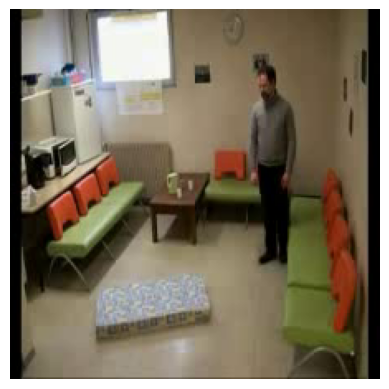

2


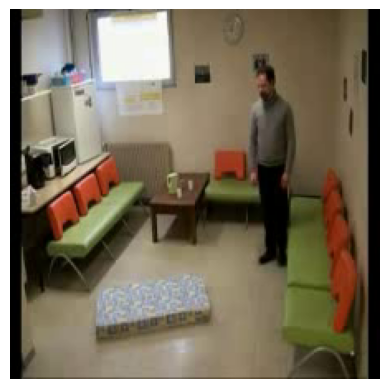

3


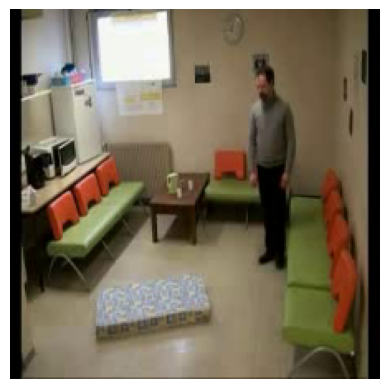

4


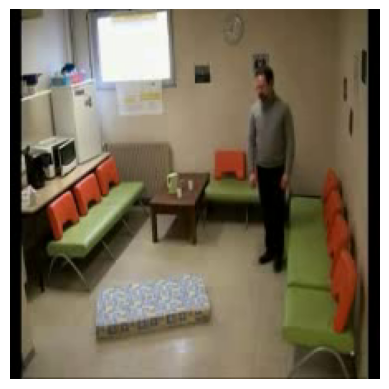

5


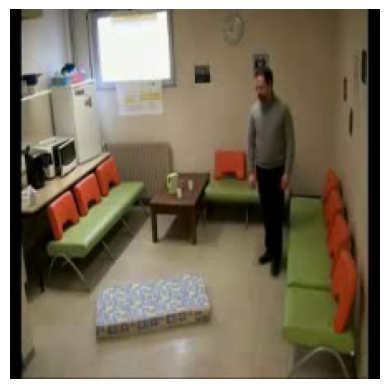

In [40]:
# Use OpenCV to read the video
# video = cv2.VideoCapture('/content/dataset_resized/train/Lying Down/video_232_flip.avi')
# video = cv2.VideoCapture('/content/abnormal/video_150.avi')
video = cv2.VideoCapture('/content/drive/MyDrive/FYP/Kaggle_Fall_dataset/Test_dataset/normal/video_11_flip (2).avi')

# Loop through the frames and display using matplotlib
c=0
while video.isOpened():
    c+=1
    print(c)
    ret, frame = video.read()
    if not ret:
        break
    # Convert frame from BGR to RGB forma
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Display frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide axes for a cleaner look
    plt.show()
    if c ==5:
      break


# Evaluation of the model result

In [ ]:
NUM_SAMPLES_VIZ = 25

testsamples, labels_ = next(iter(testloader))
testsamples, labels_ = X_test[:NUM_SAMPLES_VIZ], y_test[:NUM_SAMPLES_VIZ]

ground_truths = []
preds = []
videos_ = []

for i, (testsample, label) in enumerate(zip(testsamples, labels_)):
    # Generate gif
    with io.BytesIO() as gif:
        imageio.mimsave(gif, (testsample * 255).astype("uint8"), "GIF", fps=5)
        videos_.append(gif.getvalue())

    # Get model prediction
    output = model.predict(tf.expand_dims(testsample, axis=0))[0]
    pred = np.argmax(output, axis=0)

    ground_truths.append(label.astype("int"))
    preds.append(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [ ]:
def make_box_for_grid(image_widget, fit):
    """Make a VBox to hold caption/image for demonstrating option_fit values.

    Source: https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20Styling.html
    """
    # Make the caption
    if fit is not None:
        fit_str = "'{}'".format(fit)
    else:
        fit_str = str(fit)

    h = ipywidgets.HTML(value="" + str(fit_str) + "")

    # Make the green box with the image widget inside it
    boxb = ipywidgets.widgets.Box()
    boxb.children = [image_widget]

    # Compose into a vertical box
    vb = ipywidgets.widgets.VBox()
    vb.layout.align_items = "center"
    vb.children = [h, boxb]
    return vb


boxes = []
label_dict = {0: 'normal', 1: 'abnormal'}
for i in range(len(videos_)):

    ib = ipywidgets.widgets.Image(value=videos_[i], width=128, height=128)
    true_class = label_dict[ground_truths[i]]
    pred_class = label_dict[preds[i]]
    caption = f"T: {true_class} | P: {pred_class}"

    boxes.append(make_box_for_grid(ib, caption))

ipywidgets.widgets.GridBox(
    boxes, layout=ipywidgets.widgets.Layout(grid_template_columns="repeat(5, 200px)")
)

GridBox(children=(VBox(children=(HTML(value="'T: normal | P: abnormal'"), Box(children=(Image(value=b'GIF89a\x…